## Bayesian Grade Analysis - conjugate priors

In this analysis we'll use Bayesian techniques to examine the proportion of students getting a 1st class mark in a module I teach to thrid year students at Stirling University. We have data for a number of years and I'll use that to demonstrate how we a Bayesian approach allows us to update our knowledge as new data comes in. For the years 2010 to 2015 we have data on the total number of students who took the module and whether they got a first class mark or not. Since our outcome is a binomial random variable (first = success, not first = failure) we can use the binomial distribution to calculate our probabilites. 

### The Binomial and beta distributions

The binomial distribution tells us the probability of getting $s$ successes in $n$ trials if the probability of success is $\theta$. Here success is defined as a first class mark. The formula for the binomial probability distribution is:

$P(s) = {n \choose s}\theta^s(1-\theta)^{n-s}$

The ${n\choose s}$ part is called the binomial coefficient and is calculated by $$\frac{n!}{s!(n-s)!}$$.

The binomial distribution is a discrete distribution but the probability distribution over the parameter of interest (proportion of students who get a first class mark) should perhaps be continuous. This continuous distribution will be used to calculate $P(\theta)$ in Bayes formula. It's mathematically convenient if the continuous distribution describing my belief in the parameter of interest is of the same mathematical form as the distribution the parameter follows. Our analysis here uses the binomial distribution (discrete) as a likelihood function and one useful continuous distribution that follows the same form is the beta distribution.

The beta distribution has two parameters, $a$ and $b$ and is denoted as beta$(a,b)$. The density of the beta distribution over a parameter $\theta$ has the form:

$$p(\theta| a,\ b) = \frac{\theta^{a-1}(1-\theta)^{b-1}}{B(a,b)}$$

where $B(a,b)$ is the Beta function and acts as a normalising constant to ensure the area under the curve of the beta distribution sums to 1. The Beta function is:

$$B(a,\ b) = \int_0^1 d\theta\ \theta^{a-1}(1-\theta)^{b-1}$$

Because the beta distribution has the same mathematical form as the binomial distribution the beta distribution is said to be *conjugate* to the binomial distribution. In the beta distribution $a$ and $b$ should be positive and together they describe the shape of the beta distribution. 

### Shape of the beta distribution

The first parameter, $a$, can be thought of as the mode of the distribution i.e. where most of our probability will pile up. In this sense $a$ can be considered the 'number of successes' we've seen. If there have been a lot of successes then the beta distribution will pile more probability closer to 1 (if 1 is the code for success).

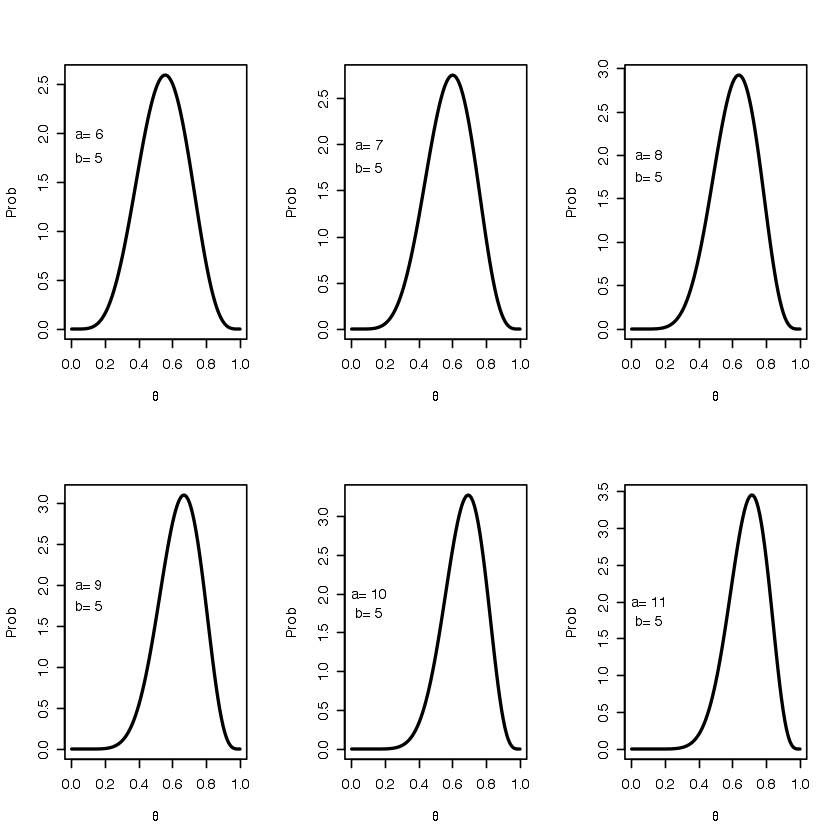

In [1]:
options(repr.plot.width=7, repr.plot.height=7) # plot sizing
par(mfrow=c(2,3)) # plotting in grid
x <- seq(0,1,0.01)
a=1;b=5
for (i in seq(0,5)){
    a_mod = a+i+5
    y=dbeta(x,a_mod,b)
    plot(x,y, type="l", ylab='Prob', xlab=expression(theta), lwd=2)
    text(0.1,2, paste('a=',a_mod))
    text(0.1,1.75, paste('b=', b))
} 

As $a$ increases the mode (highest point) of the distribution moves right - indicating more belief in an increased probability of success. Conversely if $a$ got smaller then the curve would move right.

The sum, $a+b$, controls the spread of the distribution and could be thought of as the 'amount of evidence' I've previously seen to support my 'belief' in a particular probability of success. As $a$ and $b$ get bigger the sum $a+b$ gets bigger and the distribution gets narrower representing less doubt in my belief.

If $a$ and $b$ are the same number and > 1 then the distribution is symmetrical around 0.5. One special case is if $a = b = 1$ - in this case we have a uniform distribution over the whole probability range.

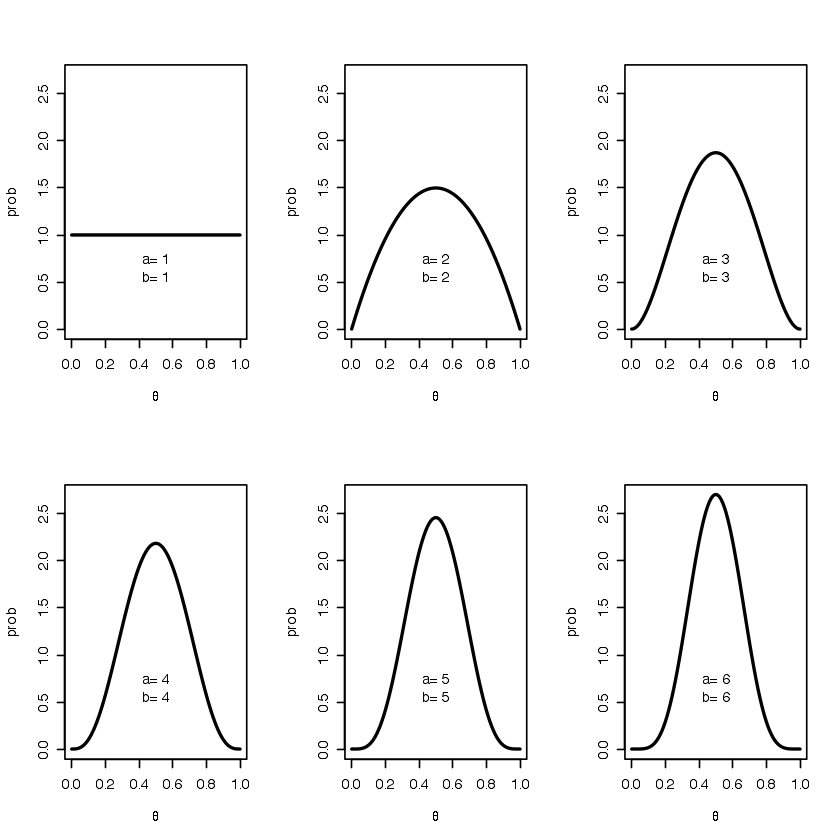

In [2]:
options(repr.plot.width=7, repr.plot.height=7) # plot sizing
par(mfrow=c(2,3)) # plotting in grid
x <- seq(0,1,0.01)
a=1;b=1
for (i in seq(0,5)){
    y=dbeta(x,a+i,b+i)
    plot(x,y, type="l", ylim=c(0,2.7), ylab='prob', xlab=expression(theta), lwd=2)
    text(0.5,0.75, paste('a=',a+i))
    text(0.5,0.55, paste('b=', b+i))
}     

### Calculating the posterior

According to Bayes rule:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

We calculate the posterior distribution for our parameter by multiplying the prior (here a $beta(a,b)$ distribution) by the likelihood - $P(data|\theta)$. The advantage of using a conjugate prior is that it simplifies the mathematics. In this case we have a binomial distribution multiplied by a beta distribution (ignoring the normalising constant in the denominator).

$${n \choose s}\theta^s(1-\theta)^{n-s} \times \theta^{a-1}(1-\theta)^{b-1}$$

Since we're multiplying the same number ($\theta$) raised to different powers all we have to do is raise $\theta$ and $1-\theta$ to the sum of powers. We end up with:

$$\theta^{(s+a-1)}(1-\theta^{(n-s+b-1)})$$

An important point to note here is that our posterior distribution is just a beta(s+a, n-s+b) distribution. This makes it easy to calculate.


## Setting a prior distribution

We are interested in finding out the distribution around the proportion of students who get first class marks. We can start to estimate this using the data we have. To illustrate the process of iterative updating from prior to posterior I'll use each year to update the posterior proportion. We'll begin with an uninformative, flat prior. We can generate this as a beta distribution with $a$ = 1 and $b$ = 1.

The first year available to us is 2010 and we'll use this data to begin the process. So we'll use the 2010 exam data and calculate an updated distribution for the proportion of students who get a first class mark.

[1]  1  1  5 58


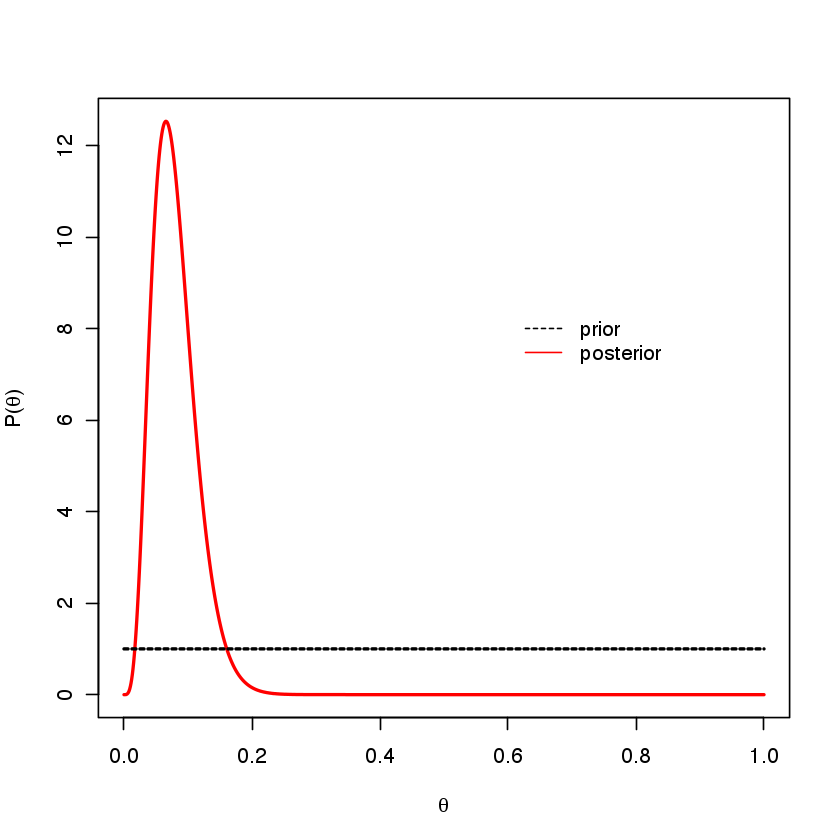

In [3]:
# get the data
data_in <- read.table('data/c5_firsts.csv', header=TRUE, sep=',')

ten <- subset(data_in, data_in$year=='2010') # 2010 data
succ <- sum(ten$first) # all successes
N <- nrow(ten) # all trials

# calc posterior using conjugate beta
a <- 1
b <- 1
x <- seq(0,1, 0.001)
y <- dbeta(x, a, b) # prior
new_y <- dbeta(x, succ+a, N-succ+b) # posterior - so easy!

plot(x,new_y, type='l', lwd=2, xlab=expression(theta), ylab=expression(paste('P(', theta, ')')), col='red')
lines(x,y, type='l', lty=2, lwd=2)
legend(x=0.6, y=max(new_y)-4, legend=c('prior', 'posterior'), col=c('black', 'red'), lty=c(2,1), bty='n')

print(c(a, b, a+succ, N-succ+b))

The 2010 marks result in us moving from a flat and uninformative prior to a posterior distribution peaked over ~0.1 and quite narrow. This suggests that a proportion of 0.1 is a fairly likely proportion. Let's now add data for each year in succession and see how the distribution of probability around the proportion changes. In each case we use the previous posterior as the new prior.

We also print the mode of each posterior distribution (i.e. the highest point). The mode of a beta distribution is defined as $\frac{a-1}{a+b-2}$.

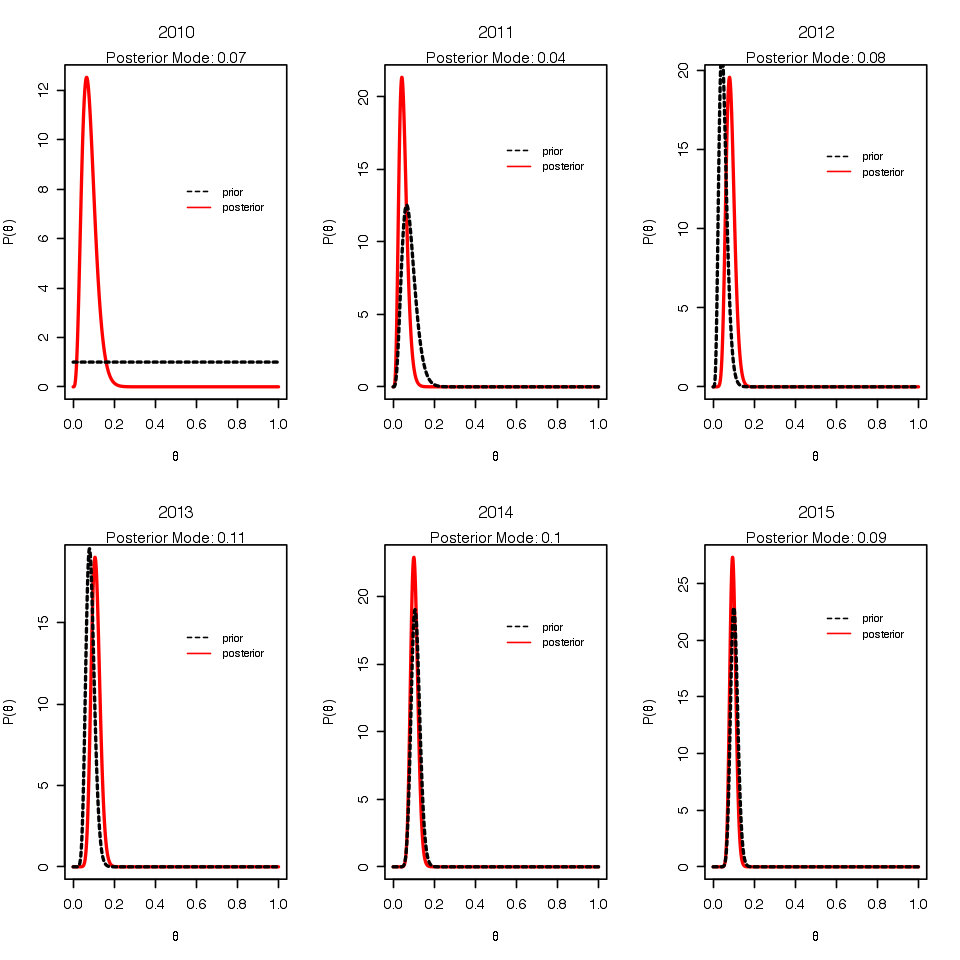

In [4]:
options(repr.plot.width=8, repr.plot.height=8) # plot sizing
par(mfrow=c(2,3))

# get the data
data_in <- read.table('data/c5_firsts.csv', header=TRUE, sep=',')
years <- c('2010', '2011', '2012', '2013', '2014', '2015')

a <- 1
b <- 1

# for each year read in data
# calc successes and total
# create a and b for posterior beta
# plot prior and posterior

for(i in 1:length(years)){
  yr_data <- subset(data_in, data_in$year==years[i])
    
  succ <- sum(yr_data$first)
  N <- nrow(yr_data)

  x <- seq(0,1, 0.001)
  y <- dbeta(x, a, b) # prior
  
  a <- a+succ
  b <- N-succ+b
  
  new_y <- dbeta(x, a, b) # posterior
  md <- (a-1)/(a+b-2) # mode of the beta posterior
    
  plot(x,new_y, type='l', lwd=2, xlab=expression(theta), ylab=expression(paste('P(', theta, ')')),
       main=years[i], col='red')
  mtext(paste('Posterior Mode: ', round(md,2), sep=''), side=3, cex=0.7)
  lines(x,y, type='l', lty=2, lwd=2, col='black')
  legend(x=0.5, y=max(new_y)-4, legend=c('prior', 'posterior'), col=c('black', 'red'), lty=c(2,1), bty='n', cex=0.8)
}

## An informed prior

We'll now examine the data using a more informed prior. My initial belief was centered around 10% of students being able to achieve a first class mark and this is supported by the data above. I therefore will create a loose beta around 10%. One way to begin to approach the parameters $a$ and $b$ required for our beta prior is to consider that the mean proportion of successes will be $m = a/(a+b)$ and the sample size ($n$) will be $n = a+b$. From this we can see that $a = mn$ and $b = (1-m)n$. 

The value of $m$ is our guess for the prior mean value of $\theta$ - here 0.1. The value of $n$ can be thought of as the amount of data we have 'previously seen' which informs our 'guesstimate' for $\theta$. In this case we're guessing but we feel somewhat happy with 10% so this could be e.g. 20 previous data points.

Now we have values for $m$ (0.1) and $n$ (20) we can calculate $a$ and $b$.

$$
a = m\times n
a = 0.1\times 20
a = 2

b = (1-m)\times n
b = (1-0.1)\times 20
b = 18
$$

Our prior distribution over $\theta$ looks like this:

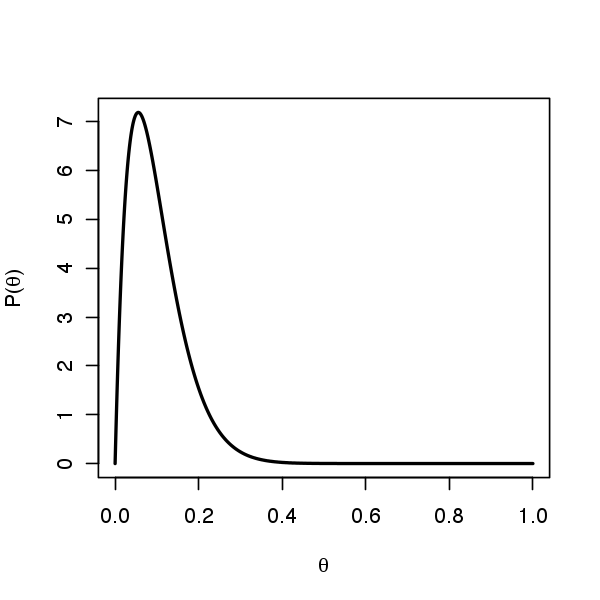

In [10]:
options(repr.plot.width=5, repr.plot.height=5) # plot sizing
x <- seq(0,1, 0.001)
y <- dbeta(x,2,18)
plot(x,y, type='l', lwd=2, xlab=expression(theta), ylab=expression(paste('P(', theta, ')')))

Now we'll simply repeat the analysis we did above with our new beta prior feeding in the data a year at a time.

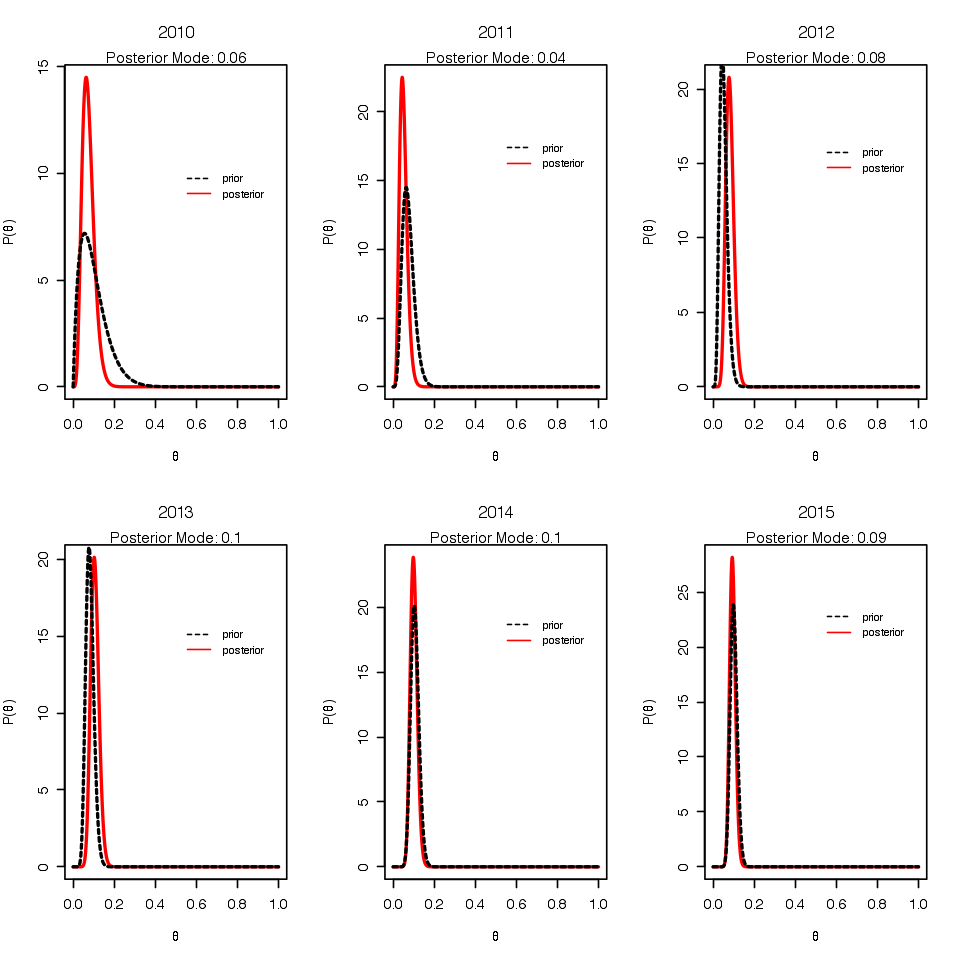

In [12]:
options(repr.plot.width=8, repr.plot.height=8) # plot sizing

par(mfrow=c(2,3))

# get the data
data_in <- read.table('data/c5_firsts.csv', header=TRUE, sep=',')
years <- c('2010', '2011', '2012', '2013', '2014', '2015')

# yr_data <- subset(data_in, data_in$year=='2010')
# succ <- sum(yr_data$first)
# N <- nrow(yr_data)

a <- 2
b <- 18

# for each subsequent year read in data
# calc successes and total
# create a and b for posterior beta
# plot prior and posterior

for(i in 1:length(years)){
  yr_data <- subset(data_in, data_in$year==years[i])
    
  succ <- sum(yr_data$first)
  N <- nrow(yr_data)

  x <- seq(0,1, 0.001)
  y <- dbeta( x, a, b) # prior
  
  a <- a+succ
  b <- N-succ+b
  
  new_y <- dbeta( x, a, b) # posterior
  md <- (a-1)/(a+b-2) # mode of the beta posterior
    
  plot(x,new_y, type='l', lwd=2, xlab=expression(theta), ylab=expression(paste('P(', theta, ')')),
       main=years[i], col='red')
  mtext(paste('Posterior Mode: ', round(md,2), sep=''), side=3, cex=0.7)
  lines(x,y, type='l', lty=2, lwd=2, col='black')
  legend(x=0.5, y=max(new_y)-4, legend=c('prior', 'posterior'), col=c('black', 'red'), lty=c(2,1), bty='n', cex=0.8)
}

## Impact of a poor prior

In the analysis below we can see the effect that an initial prior with a mode of 0.8 has on our parameter estimate. Given that my intial guess for the proportion of students getting a first class mark was ~10% this prior over 80% is not particularly sensible. Although the estimate of $\theta$ starts off a good distance from our estimates above we can see that the data rapidly pulls the posterior distribution over the the lower end of the estimates. Additionally once we have analysed all our data the prior and posterior are approaching the same estimate as before.

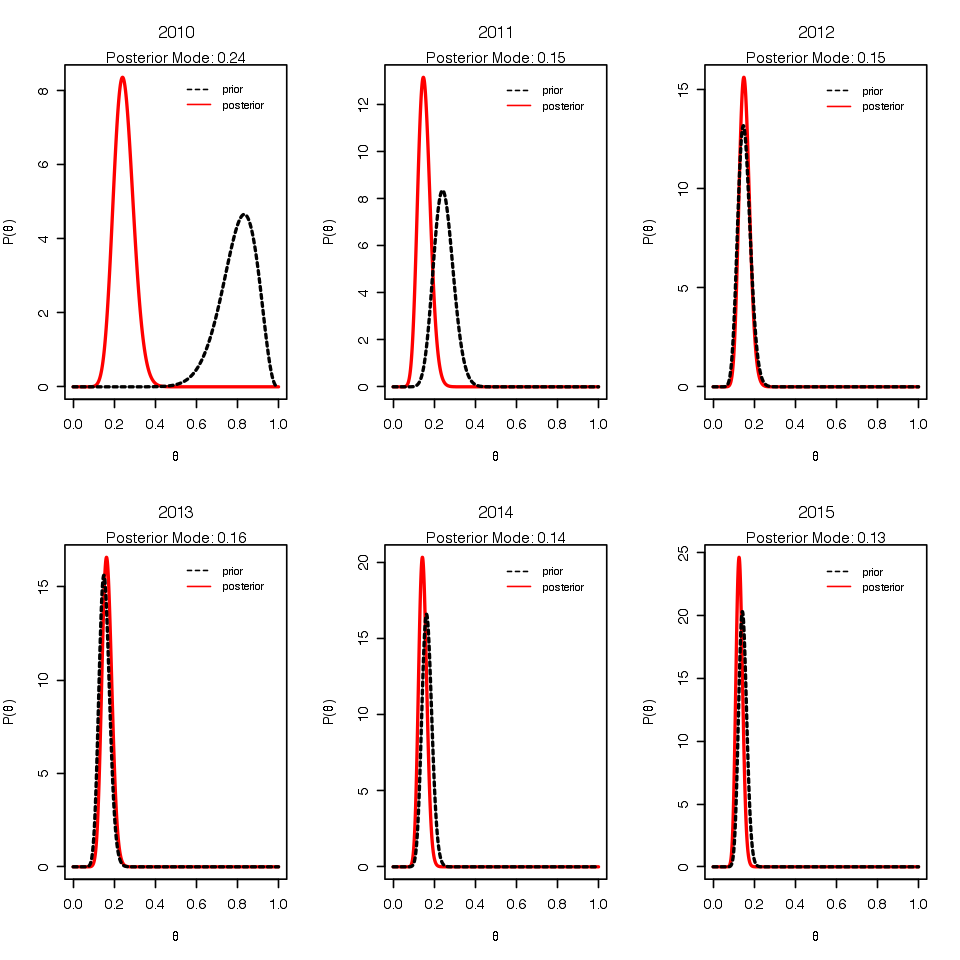

In [7]:
options(repr.plot.width=8, repr.plot.height=8) # plot sizing

par(mfrow=c(2,3))

# get the data
data_in <- read.table('data/c5_firsts.csv', header=TRUE, sep=',')
years <- c('2010', '2011', '2012', '2013', '2014', '2015')

# yr_data <- subset(data_in, data_in$year=='2010')
# succ <- sum(yr_data$first)
# N <- nrow(yr_data)

a <- 16
b <- 4

# for each subsequent year read in data
# calc successes and total
# create a and b for posterior beta
# plot prior and posterior

for(i in 1:length(years)){
  yr_data <- subset(data_in, data_in$year==years[i])
    
  succ <- sum(yr_data$first)
  N <- nrow(yr_data)

  x <- seq(0,1, 0.001)
  y <- dbeta( x, a, b) # prior
  
  a <- a+succ
  b <- N-succ+b
  
  new_y <- dbeta( x, a, b) # posterior
  md <- (a-1)/(a+b-2)
    
  plot(x,new_y, type='l', lwd=2, xlab=expression(theta), ylab=expression(paste('P(', theta, ')')),
       main=years[i], col='red')
  mtext(paste('Posterior Mode: ', round(md,2), sep=''), side=3, cex=0.7)
  lines(x,y, type='l', lty=2, lwd=2, col='black')
  legend(x=0.5, y=max(new_y)+0.1, legend=c('prior', 'posterior'), col=c('black', 'red'), lty=c(2,1), bty='n', cex=0.8)
}